# Utils

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
if os.environ.get("ALTOHORIZONTE"):
    print('set')
    data_directory = os.environ['ALTOHORIZONTE']
else:
    print('not set')

set


In [3]:
data_directory

'C:\\Users\\joaquin\\Desktop\\alto_horizonte'

# Single File Visualization


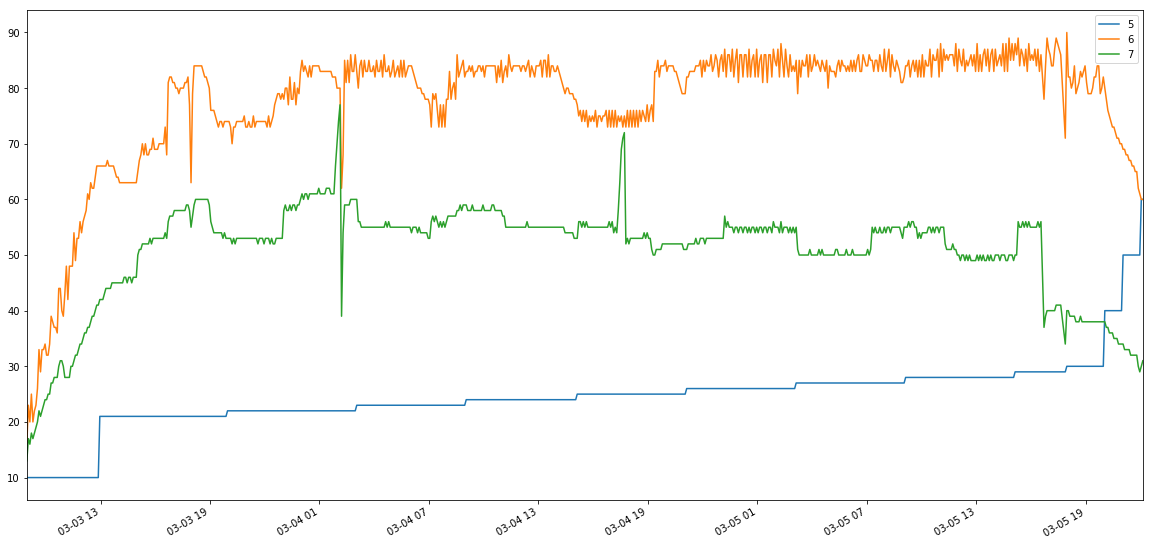

In [46]:
df = pd.read_csv(data_directory + '/Datos/ts_2017/'+'E0103037.txt',sep='\t',header=None)
new_index = pd.to_datetime(df[0]+' '+df[1],dayfirst=True)
f = plt.figure()
df =df.set_index(new_index)
# df[[5,6,7,8,9,49,44,45,63]].plot(kind='line',figsize=(20,10))
df[[5,6,7]].plot(kind='line',figsize=(20,10),label='Inline label')
plt.show()

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2017-03-03 08:57:35 to 2017-03-05 22:07:38
Data columns (total 64 columns):
0     732 non-null object
1     732 non-null object
2     732 non-null object
3     732 non-null object
4     732 non-null int64
5     732 non-null int64
6     732 non-null int64
7     732 non-null int64
8     732 non-null int64
9     732 non-null int64
10    732 non-null int64
11    732 non-null int64
12    732 non-null int64
13    732 non-null int64
14    732 non-null int64
15    732 non-null int64
16    732 non-null int64
17    732 non-null int64
18    732 non-null int64
19    732 non-null int64
20    732 non-null int64
21    732 non-null int64
22    732 non-null int64
23    732 non-null int64
24    732 non-null int64
25    732 non-null int64
26    732 non-null int64
27    732 non-null int64
28    732 non-null int64
29    732 non-null int64
30    732 non-null int64
31    732 non-null int64
32    732 non-null int64
33    732 non-null int64
34  

# Data Preparation
Dont run if caldera_times.csv is already created.

In [14]:
def load_year_files(year):
    file_names = [os.path.basename(x) for x in glob.glob(data_directory+'/Datos/ts_'+year+'/[!~]*.TXT')]
    dir_files = glob.glob(data_directory+'/Datos/ts_' + year  +'/[!~]*.TXT')
    print('Total Archivos',len(file_names))
    print(len(dir_files))
    
    caldera_list = []
    caldera_names = []
    proceso = 0
    for file_name in file_names:
        df = pd.read_csv(data_directory + '/Datos/ts_'+year+'/'+file_name,sep='\t',header=None)
        new_index = new_index = pd.to_datetime(df[0]+' '+df[1],dayfirst=True)
        df = df.set_index(new_index)
        df['nro_caldera'] = (file_name[:3])[2]
        df['proceso'] = proceso
        df = df.drop([0,1],axis=1)
        caldera_list.append(df)
        proceso += 1
    
    caldera = pd.concat(caldera_list)
    print(caldera.shape)
    return caldera

def clean_mydf(df):
    caldera_mean = df.describe()
    caldera_mean = caldera_mean.loc['mean',:]
    caldera_mean_tmp = caldera_mean.reset_index()
    drop_columns= caldera_mean_tmp.loc[caldera_mean_tmp['mean'] == 0].set_index('index').index.values
    df = df.drop(drop_columns,axis=1)
    return df


In [15]:
caldera = load_year_files('2018')

Total Archivos 90
90
(61508, 64)


In [23]:
caldera[caldera.proceso==40].shape

(1016, 64)

In [231]:
# tmp.head()

In [25]:
tmp = clean_mydf(caldera)

In [88]:
# tmp.columns

In [89]:
# tmp.plot()
# plt.show()

In [26]:
c_2018 = clean_mydf(load_year_files('2018'))
c_2018.to_csv('..\\Datos\\caldera_2018.csv')
c_2017 = clean_mydf(load_year_files('2017'))
c_2017.to_csv('..\\Datos\\caldera_2017.csv')
c_2016 = clean_mydf(load_year_files('2016'))
c_2016.to_csv('..\\Datos\\caldera_2016.csv')

Total Archivos 90
90
(61508, 64)
Total Archivos 268
268
(249864, 64)
Total Archivos 190
190
(156783, 64)


In [27]:
c_2018.nro_caldera = c_2018.nro_caldera.astype(int)
c1_2018 = c_2018[c_2018['nro_caldera'] == 1]
c2_2018 = c_2018[c_2018['nro_caldera'] == 2]
c3_2018 = c_2018[c_2018['nro_caldera'] == 3]
c4_2018 = c_2018[c_2018['nro_caldera'] == 4]
c1_2018.to_csv('..\\Datos\\ts_2018\\c1_2018.csv')
c2_2018.to_csv('..\\Datos\\ts_2018\\c2_2018.csv')
c3_2018.to_csv('..\\Datos\\ts_2018\\c3_2018.csv')
c4_2018.to_csv('..\\Datos\\ts_2018\\c4_2018.csv')

c_2017.nro_caldera = c_2017.nro_caldera.astype(int)
c1_2017 = c_2017.loc[c_2017['nro_caldera'] == 1]
c2_2017 = c_2017.loc[c_2017['nro_caldera'] == 2]
c3_2017 = c_2017.loc[c_2017['nro_caldera'] == 3]
c4_2017 = c_2017.loc[c_2017['nro_caldera'] == 4]
c1_2017.to_csv('..\\Datos\\ts_2017\\c1_2017.csv')
c2_2017.to_csv('..\\Datos\\ts_2017\\c2_2017.csv')
c3_2017.to_csv('..\\Datos\\ts_2017\\c3_2017.csv')
c4_2017.to_csv('..\\Datos\\ts_2017\\c4_2017.csv')

c_2016.nro_caldera = c_2016.nro_caldera.astype(int)
c1_2016 = c_2016.loc[c_2016['nro_caldera'] == 1]
c2_2016 = c_2016.loc[c_2016['nro_caldera'] == 2]
c3_2016 = c_2016.loc[c_2016['nro_caldera'] == 3]
c4_2016 = c_2016.loc[c_2016['nro_caldera'] == 4]
c1_2017.to_csv('..\\Datos\\ts_2016\\c1_2016.csv')
c2_2017.to_csv('..\\Datos\\ts_2016\\c2_2016.csv')
c3_2017.to_csv('..\\Datos\\ts_2016\\c3_2016.csv')
c4_2017.to_csv('..\\Datos\\ts_2016\\c4_2016.csv')
print('Done')

Done


In [240]:
c1_2018[61].index

Index(['2018/03/03 10:54:47', '2018/03/03 10:59:47', '2018/03/03 11:04:47',
       '2018/03/03 11:09:47', '2018/03/03 11:14:47', '2018/03/03 11:19:47',
       '2018/03/03 11:24:47', '2018/03/03 11:29:47', '2018/03/03 11:34:47',
       '2018/03/03 11:39:47',
       ...
       '2018/31/03 04:07:04', '2018/31/03 04:12:04', '2018/31/03 04:17:04',
       '2018/31/03 04:22:04', '2018/31/03 04:27:04', '2018/31/03 04:32:05',
       '2018/31/03 04:37:05', '2018/31/03 04:42:05', '2018/31/03 04:47:05',
       '2018/31/03 04:52:05'],
      dtype='object', length=7224)

[]

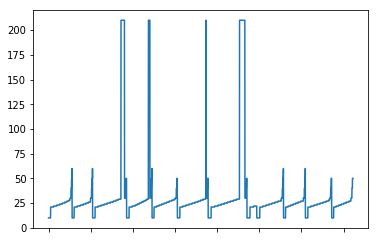

In [241]:
c1_2018[5].plot()
plt.plot()

In [295]:
# caldera.head(1000).to_excel(data_directory + "/Datos/caldera_times.xlsx")

In [33]:
# caldera.to_csv(data_directory + "/Datos/caldera_2016.csv")

# Caldera Csv

In [276]:
c1_2018 = pd.read_csv('..\\Datos\\ts_2018\\c1_2018.csv',parse_dates={'date':[0]},index_col='date')
c1_2018 = c1_2018.set_index(pd.to_datetime(c1_2018.index.values,format='%Y-%M-%d %H:%M:%S'))
# caldera_mean = caldera_times.describe()
# caldera_mean = caldera_mean.loc['mean',:]

# caldera_mean_tmp = caldera_mean.reset_index()
# caldera_mean_tmp
# drop_columns= caldera_mean_tmp.loc[caldera_mean_tmp['mean'] == 0].set_index('index').index.values.astype(str)

# caldera_times = caldera_times.drop(drop_columns,axis=1)

error: redefinition of group name 'M' as group 5; was group 2 at position 107

In [103]:
caldera_times = caldera_times.reset_index()
caldera_times[caldera_times.isnull().any(axis=1)]
caldera_times = caldera_times.dropna()

In [13]:
# print(caldera_times.info())

In [104]:
new_index = pd.to_datetime(caldera_times.timestamp,errors='coerce')
caldera_times = caldera_times.set_index(new_index).drop(['timestamp','3'],axis=1)

# print(type(new_index))

In [105]:
caldera_times['2'] = caldera_times['2'].astype('category')

In [ ]:
columns_names=['Date','Hora','Fase','Vent','TBS','TBU','UR','UMd','DF','Pres']

In [78]:
# caldera_times.head()

,2,5,6,7,8,9,10,11,12,13,...,45,46,47,48,49,50,60,61,62,63
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-02 17:47:52,,4.0,4.0,4.0,1.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2827.0,2816.0
2016-11-02 20:59:52,<-,10.0,22.0,17.0,73.0,0.0,1.0,0.0,5.0,5.0,...,17.0,73.0,22.0,0.0,73.0,0.0,0.0,5.0,5654.0,1.0
2016-11-02 21:04:53,<-,10.0,23.0,18.0,73.0,0.0,6.0,0.0,5.0,5.0,...,18.0,76.0,23.0,0.0,73.0,0.0,0.0,5.0,5654.0,1.0
2016-11-02 21:09:53,<-,10.0,23.0,19.0,76.0,0.0,11.0,0.0,5.0,5.0,...,19.0,82.0,23.0,0.0,76.0,0.0,0.0,5.0,5654.0,1.0
2016-11-02 21:14:52,<-,10.0,24.0,20.0,76.0,0.0,16.0,0.0,4.0,5.0,...,20.0,88.0,24.0,0.0,76.0,0.0,0.0,5.0,5654.0,1.0


In [79]:
# caldera_times.describe()

,5,6,7,8,9,10,11,12,13,14,...,45,46,47,48,49,50,60,61,62,63
count,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,...,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000,468154.000000
mean,55.145696,79.791282,60.143169,43.085198,0.061678,303.117814,0.000252,4.015999,4.035360,4.037347,...,60.121088,52.054219,75.334774,0.000741,51.194611,0.000004,0.005276,4.951905,20531.337380,4.620862
std,69.119652,28.697874,11.379483,19.682702,1.942702,439.670424,0.172460,1.501678,4.716542,4.946537,...,11.381792,23.593748,14.172592,0.212634,24.352007,0.002923,1.940952,0.435968,3061.923712,122.092217
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,23.000000,78.000000,54.000000,27.000000,0.000000,90.000000,0.000000,4.000000,4.000000,4.000000,...,54.000000,31.000000,72.000000,0.000000,30.000000,0.000000,0.000000,5.000000,20538.000000,0.000000
50%,26.000000,83.000000,61.000000,39.000000,0.000000,201.000000,0.000000,4.000000,4.000000,4.000000,...,61.000000,50.000000,79.000000,0.000000,49.000000,0.000000,0.000000,5.000000,21812.000000,0.000000
75%,29.000000,86.000000,69.000000,58.000000,0.000000,327.000000,0.000000,4.000000,4.000000,4.000000,...,69.000000,71.000000,84.000000,0.000000,71.000000,0.000000,0.000000,5.000000,21828.000000,0.000000
max,219.000000,17928.000000,942.000000,127.000000,79.000000,5499.000000,118.000000,1024.000000,1024.000000,1024.000000,...,186.000000,119.000000,127.000000,100.000000,127.000000,2.000000,1103.000000,5.000000,63298.000000,21815.000000


In [106]:
caldera_2016 = caldera_times.loc['2016',:]
caldera_2017 = caldera_times.loc['2017',:]
caldera_2018 = caldera_times.loc['2018',:]
print(caldera_2016.shape)
print(caldera_2017.shape)
print(caldera_2018.shape)

(158324, 27)
(246090, 27)
(61257, 27)


In [190]:
# caldera_times.info()

In [241]:
caldera_view = caldera_times


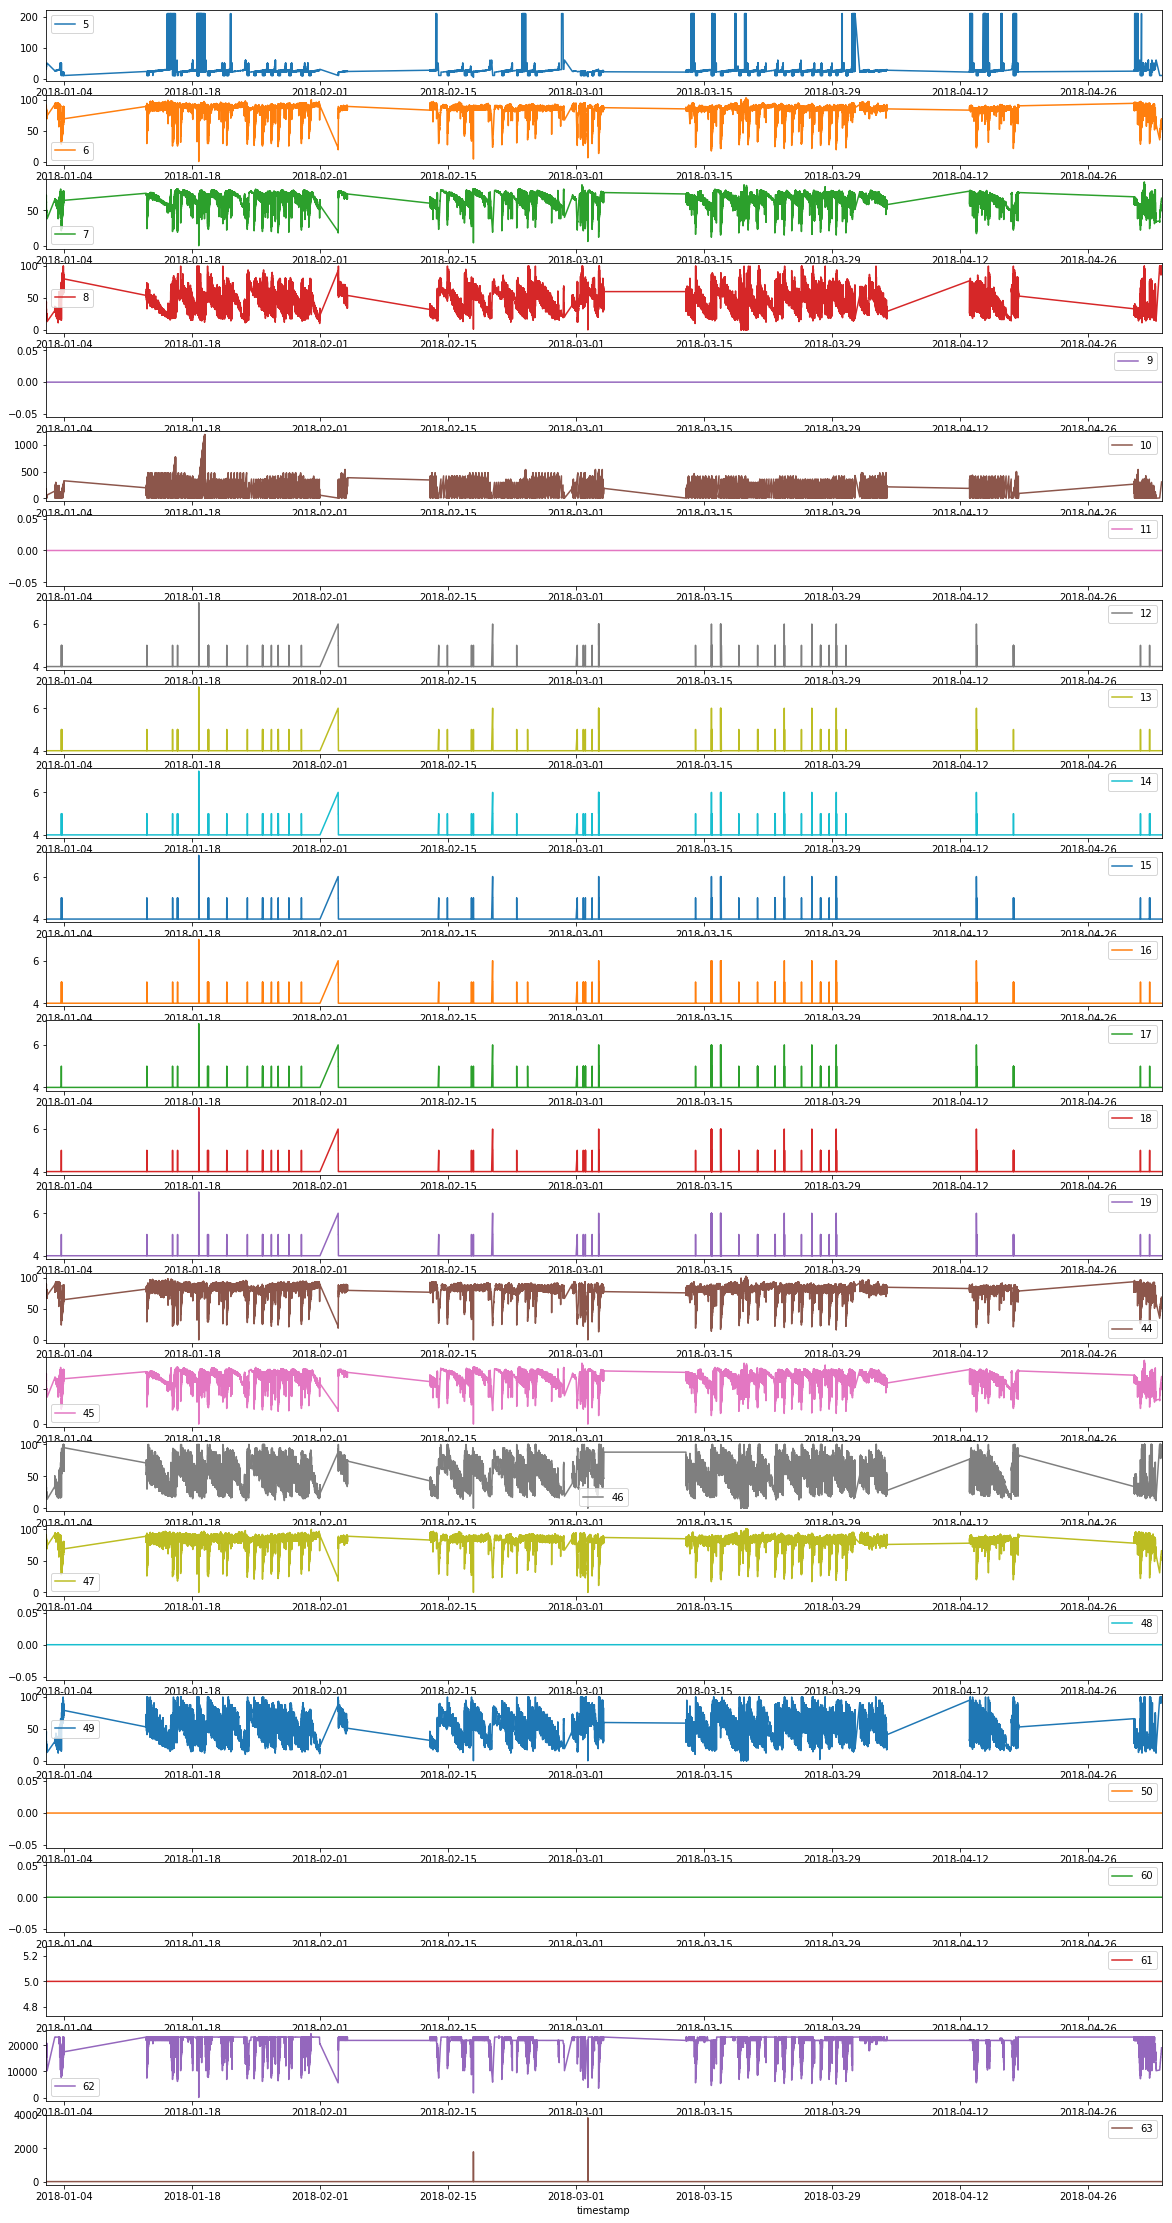

In [307]:
data = caldera_times.loc['2018']
# data.info()
data = data.loc['2018-1':'2018-5',:]
ax = data.plot(kind='line',figsize=(20,40),subplots=True,sharex=False,sharey=False)
fig=ax[0].get_figure()
plt.show()
fig.savefig('ts_2018T1.jpg')



In [ ]:
data = data.reset_index()

In [306]:
plt.scatter(data.index.values, data['5'],alpha=0.5)

ValueError: cannot insert level_0, already exists

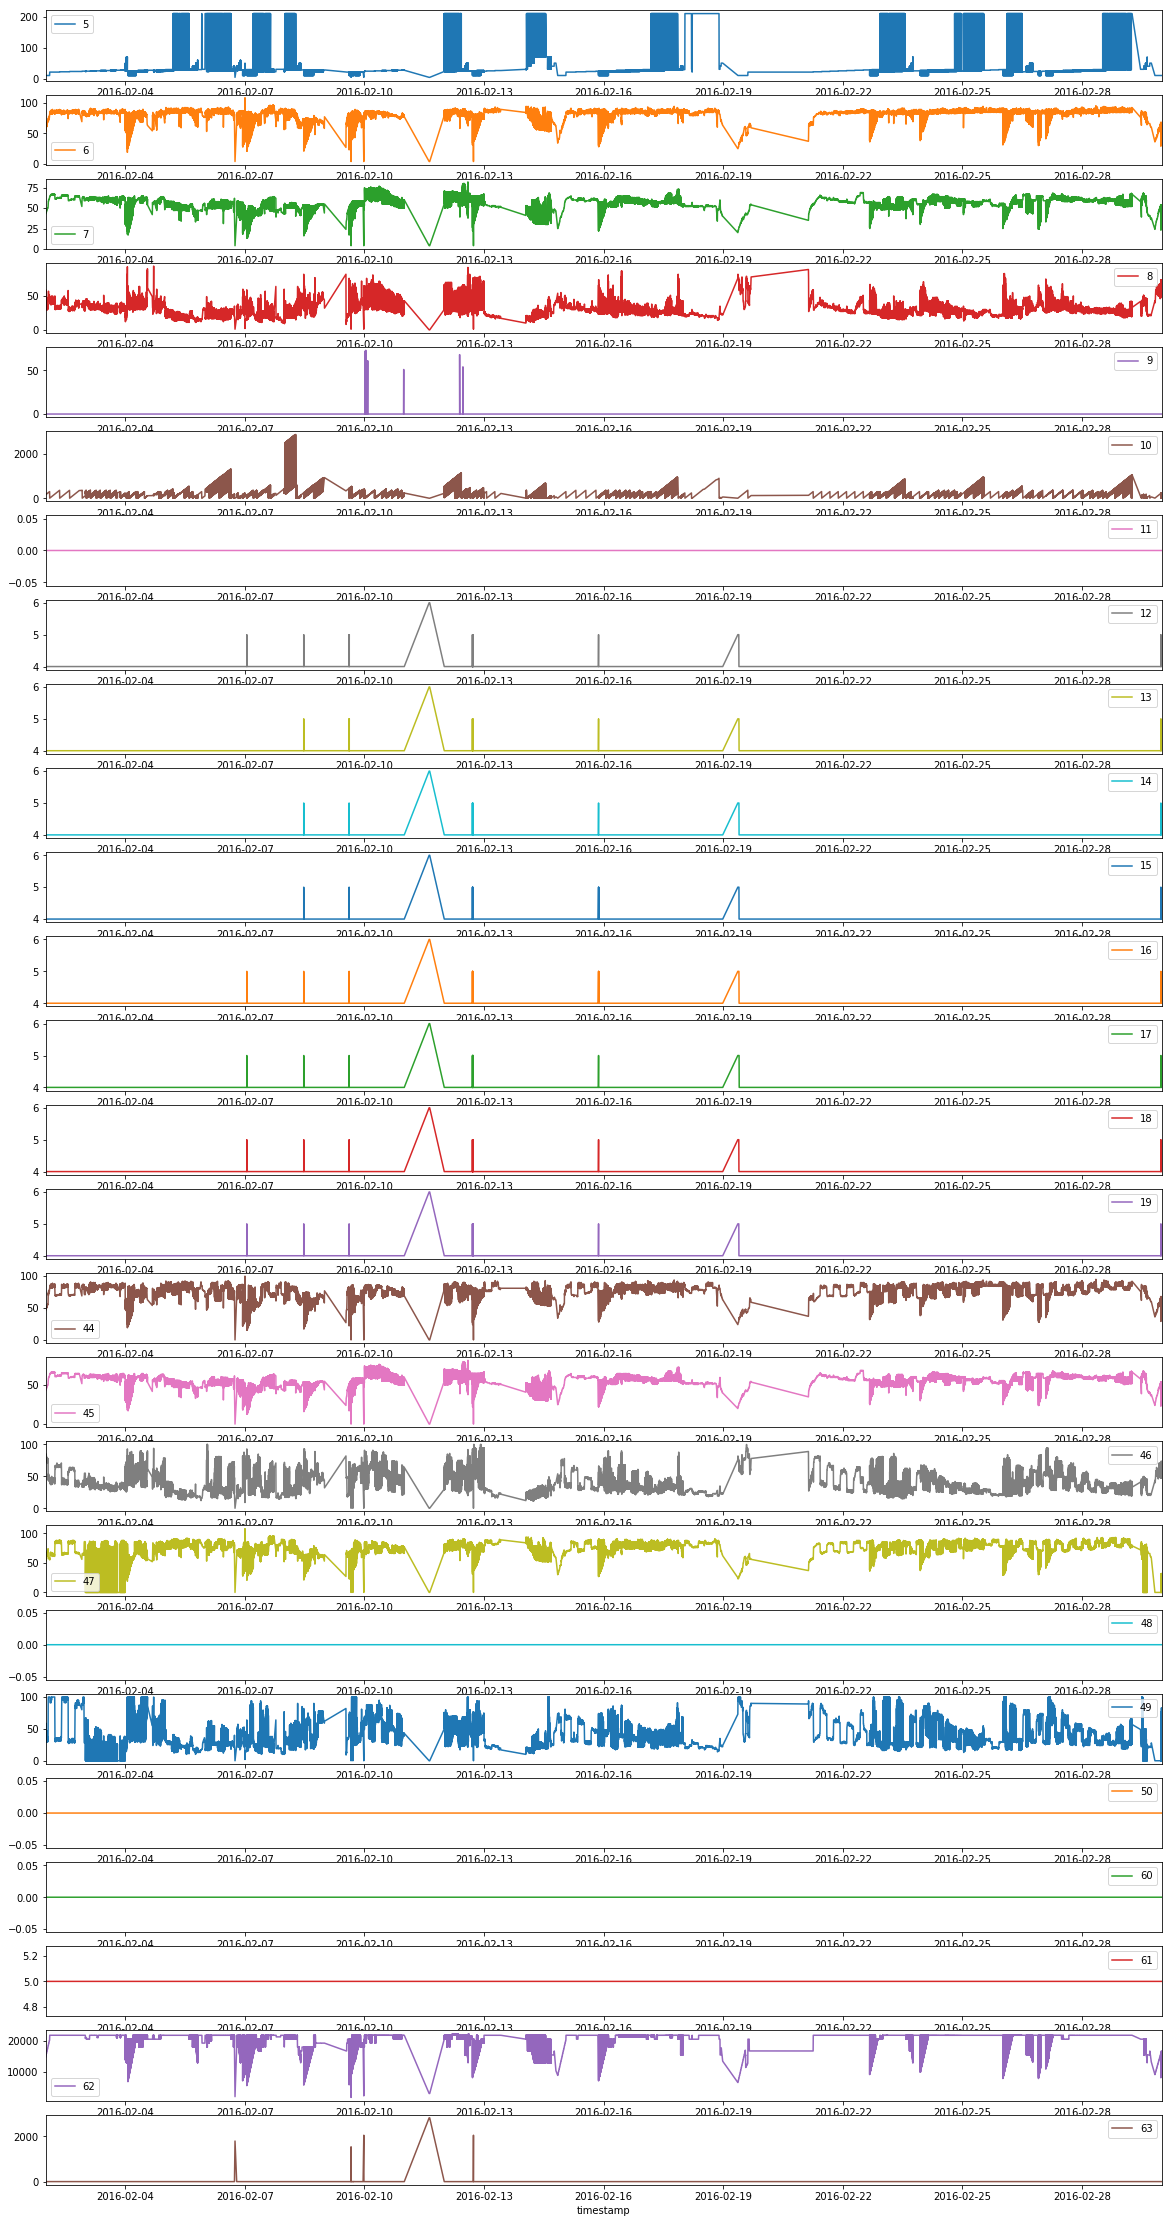

In [179]:
# caldera_times['2016'].plot(subplots=True,layout=(13,2),figsize=(20,30),sharex=False,sharey=False)
# plt.show()

plot = caldera_view.plot(subplots=True, figsize=(20,40),sharex=False)
fig=plot[0].get_figure()
fig.savefig('time_series.jpg')
plt.show()


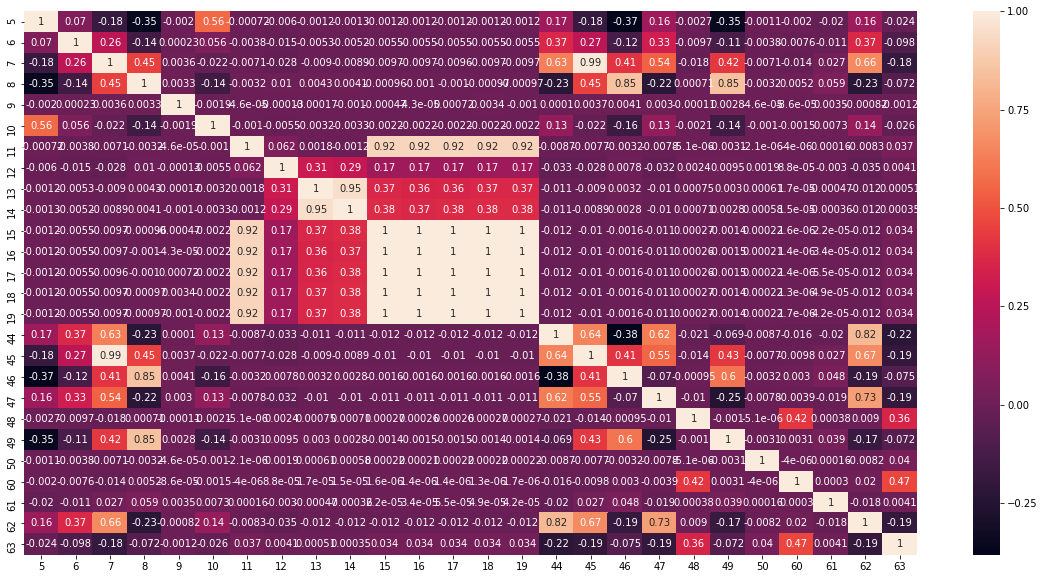

In [182]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
corr_p = caldera_view.corr(method='pearson')
# print(corr_p)

import seaborn as sns
f = plt.figure(figsize=(20,10))
g = sns.heatmap(corr_p, annot=True).get_figure()
g.savefig('time_series_corr.png')

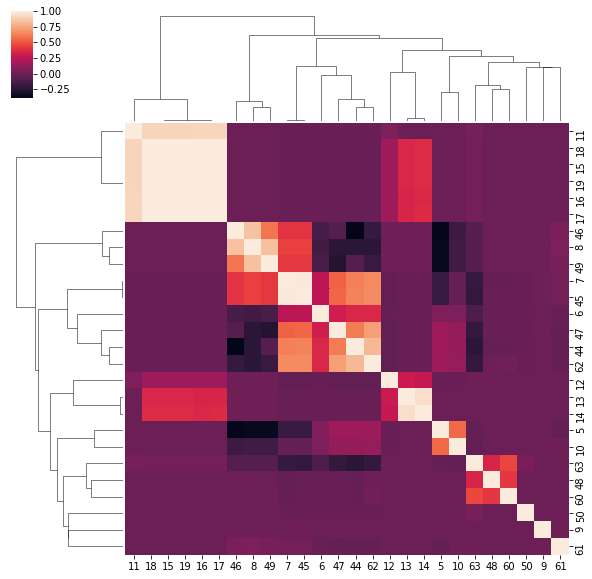

In [183]:
sns.clustermap(corr_p)

In [111]:
# caldera_times['2017'].plot(subplots=True,layout=(13,2),figsize=(20,30),sharex=False,sharey=False)
# plt.show()

In [112]:
# caldera_times['2018'].plot(subplots=True,figsize=(20,30))
# plt.show()

In [128]:
samples = caldera_times.loc['2016-02':'2016-03','5']
print(samples.reset_index().shape)
samples.as_matrix().scatter(samples[0],samples[1],alpha=0.5)
plt.show()

(23541, 2)


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

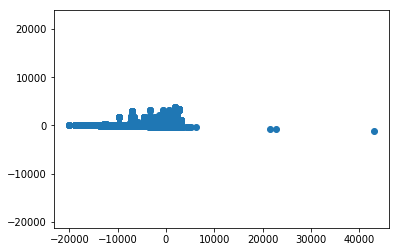

NameError: name 'pearsonr' is not defined

In [65]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

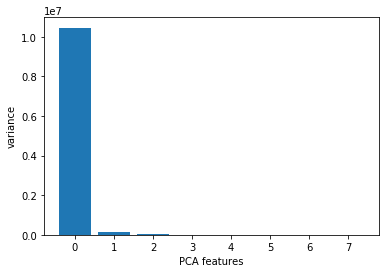

In [54]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(samples)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

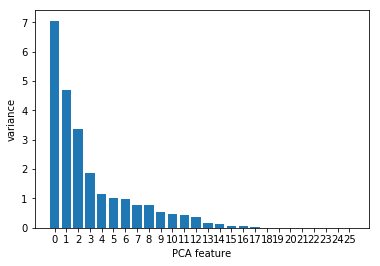

In [53]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


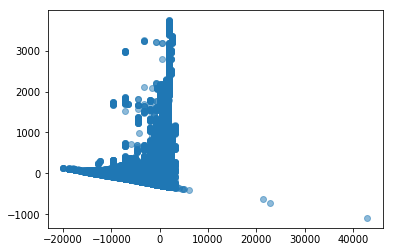

In [57]:
pca = PCA(n_components = 2)
pca.fit(samples)
transformed = pca.transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

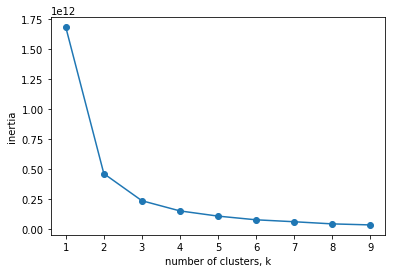

In [48]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(caldera_2016.drop(['2'],axis=1))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


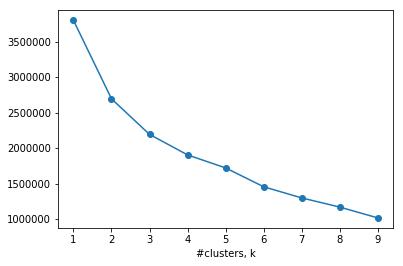

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
scaler = StandardScaler()

for k in ks:
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(samples)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
 
# for k in ks:
#     model = KMeans(n_clusters=k)
# #     pipeline = make_pipeline(scaler,model)
#     model.fit(personas)
#     inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

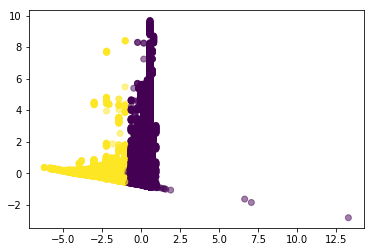

In [63]:
#Clustering

scaler = StandardScaler()

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
km.fit(samples)

# pipeline = make_pipeline(scaler,km)
# pipeline.fit(personas)

# clusters = km.fit_predict(personas)
# personas['cluster'] = pipeline.fit_predict(personas)
clusters = km.fit_predict(samples)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(samples)

xs = pca.fit_transform(samples)[:, 0]
ys = pca.fit_transform(samples)[:, 1]

plt.scatter(xs ,ys, c=clusters,alpha=0.5)
plt.show()